<a href="https://colab.research.google.com/github/OrJaku/Machine_Learning/blob/master/Boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import boston_housing
import numpy as np

(train_data, train_target), (test_data, test_target) = boston_housing.load_data()

In [0]:
mean = train_data.mean(axis=0) #Mean value of train_data
train_data -= mean
# print("Mean", mean)
std = train_data.std(axis=0) #Standard deviation of train_data
train_data /= std

test_data -= mean
test_data /= std

array([-0.40342651,  2.99178419, -1.33391162, -0.25683275, -1.21518188,
        1.89434613, -1.91036058,  1.24758524, -0.85646254, -0.34843254,
       -1.71818909,  0.43190599, -1.32920239])

In [0]:
from keras import models
from keras import layers 

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64,activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['mae'])
    return model



In [5]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_score = []
for i in range(k):
    print("procesing fold #", i)
    val_data = train_data[i * num_val_samples : (i+1) * num_val_samples] #Data
    val_target = train_target[i * num_val_samples : (i+1) * num_val_samples] #Target 

    partial_train_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1) * num_val_samples:]], axis=0) #Data
    partial_train_target = np.concatenate([train_target[:i*num_val_samples], train_target[(i+1) * num_val_samples:]], axis=0) #Target 

    model = build_model()
    history = model.fit(partial_train_data, 
              partial_train_target,
              validation_data=(val_data, val_target),
              epochs = num_epochs,
              batch_size=1,
              verbose=0)

    mea_history = history.history['val_mean_absolute_error']
    all_score.append(mea_history)

procesing fold # 0












procesing fold # 1
procesing fold # 2
procesing fold # 3


In [6]:
print("All Score:", all_score)
print("Mean:", np.mean(all_score))

All Score: [[3.6655985954964514, 3.0431049554654868, 2.5387389400217795, 2.5209062311908985, 2.3843354045754612, 2.2813850440601313, 2.131549882416678, 2.4009840653674437, 2.321951922803822, 2.3636486223428554, 2.129497485585732, 2.245046341773307, 2.0991168447060162, 2.282419006423195, 2.0522993484345995, 1.9129895502978032, 2.063593042959081, 1.891771137124241, 1.9685132574326922, 1.8144416195331234, 2.077685526101896, 2.1232330586650585, 2.1614232110505056, 1.9520045554283822, 1.951056433196115, 1.9307335532537782, 1.8422356218394667, 1.895258601349179, 2.005214747816029, 2.013912795793892, 2.1108991887309765, 1.9180226656469967, 1.9314560276446957, 1.8618186251951916, 2.170373170682699, 2.0409780823358217, 2.324758831817325, 2.0150508314076037, 1.8391292071578527, 1.7857181105283226, 1.9006118113451664, 1.970568836325466, 1.8771202635056903, 2.426353898378882, 2.273509771517008, 1.8917596080515644, 2.343011497270943, 1.9961580899682376, 1.7582331836813747, 2.317734453937795, 2.3223

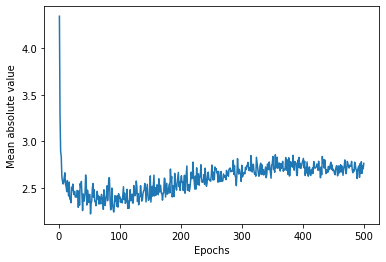

In [12]:
average_mae_history = [np.mean([x[i] for x in all_score]) for i in range(num_epochs)]
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Mean absolute value')
plt.show()